<a href="https://colab.research.google.com/github/stevenlavelle1/CNN/blob/main/CS4287_Assign2_21332207_21316945_21342342.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Team Members
- Mohd Humayun: 21332207
- Steven Lavelle: 21316945
- Sean Caplis: 21342342

## Code exexcution status
- Executes without error

##Sources
- https://www.youtube.com/watch?v=zBOavqh3kWU
- https://medium.com/@nitishkundu1993/exploring-resnet50-an-in-depth-look-at-the-model-architecture-and-code-implementation-d8d8fa67e46f
- https://msalamiitd.medium.com/how-to-pass-image-datasets-to-cnn-models-using-image-data-generations-b2d9497c7a35
- https://www.researchgate.net/publication/362394275_A_Comprehensive_Review_of_Machine_Learning_Used_to_Combat_COVID-19
- https://www.researchgate.net/publication/369784759_Application_of_machine_learning_for_crack_detection_on_concrete_structures_using_CNN_architecture
- Mascarenhas, S. and Agarwal, M., 2021, November. A comparison between VGG16, VGG19 and ResNet50 architecture frameworks for Image Classification. In 2021 International conference on disruptive technologies for multi-disciplinary research and applications (CENTCON) (Vol. 1, pp. 96-99). IEEE.
- He, K., Zhang, X., Ren, S. and Sun, J., 2016. Deep residual learning for image recognition. In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 770-778).

## Dataset description

### Source
The dataset used for this project is the [Scene classification Dataset](https://www.kaggle.com/datasets/nitishabharathi/scene-classification). This dataset contains images of scenery.

### Overview
- Total Images: Over 17000 in the train.csv
- Number of Classes: 6
 - Buildings
 - Forests
 - Glaciers
 - Streets
 - Mountains
 - Sea
- Image Type is .jpg
- Image Dimensions: Varying sizes, resized to 224x224 for training.

### Features
- image_name: The name of the image file.
- label: The corresponding scene category for the image. This is the target variable the model is trained to predict.

### Class Distribution
From our class distribution, the dataset contains the following number of samples for each category:

Buildings: ~2,600
Forests: ~2,700
Mountains: ~2,900
Sea: ~2,700
Street: ~2,750
Glacier: ~2,800
Because our dataset is only slightly imbalanced we did not normalise the classes.
- Some of the categories have more samples than others. For example Mountains and Glaciers, have more samples than other categories, like Seas and Buildings. This can also be seen in the class distribution plot.
- Images within the same class can have significant variations in lighting, perspective, and quality.
- Certain classes, such as Glaciers and Mountains, share similar visual features, making them harder to distinguish. Sea and Street images may include structures or natural elements that resemble other categories.
- It can also be difficult to distinguish images that have have 2 different categories such as an image of a mountain containing a lake or a forest or Street scenes with Buildings or cars.
- Another thing to point out is the time of year of when the images were taken. Mountains may look more like glaciers dependent on the type of season.


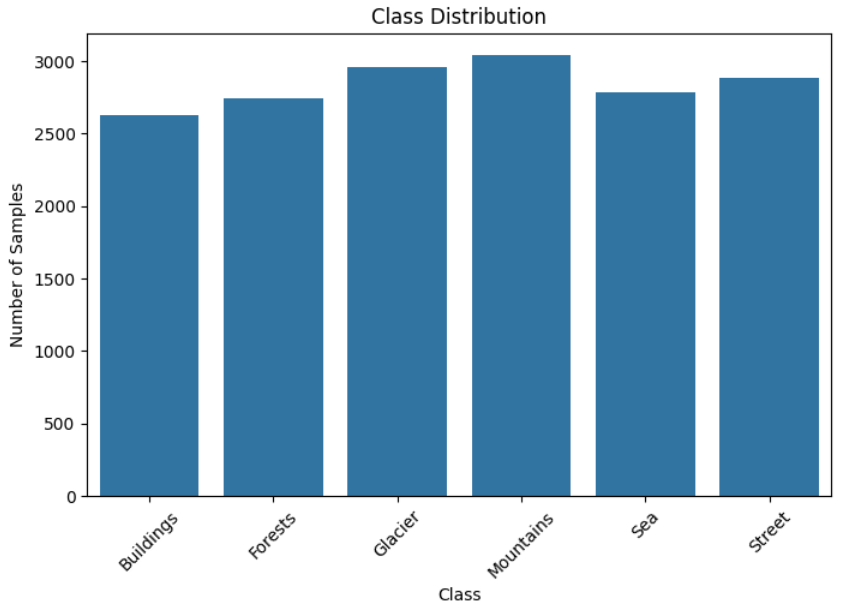

### Preprocessing
Pre-processing allows us make sure that the data we are using to train is clean. This is done so that the data is consistent throughout the whole process and ready for use in training convolutional neural networks. For the Scene classification dataset that we chose to use, we had to use pre-processing. This was because there was variety in image sizes. As well as that there were also inconsistencies with label formats and data quality. This process aimed to improve the model's performance by standardizing inputs and augmenting the dataset for better generalization.

- **Image Resizing:** The images in the dataset varied in size. This could cause problems as convoluted neural networks require fixed input dimensions for their layers to function correctly. Due to the data not being clean and still raw in the dataset we had to change the dimensions to 224x224 pixels. This made sure that the image size ensured that all samples were treated equally, which ensured that the images were all consistent and compatible for training the model.
- **Label decoding:** The dataset classes were categorized numerically using integers ranging from 0 to 5, with each integer representing a different class. While numerical labels are machine readable, they are not helpful for humans. By mapping these values into their equivalent categorical labels, the dataset becomes more recognizable to humans.
- **Normalisation:** We used normalisation to ensure that the pixel values are on the same scale. This can prevent certain problems from arising that may affect training. The Pixel values of the dataset that were originally ranging from 0 to 255 were changed to [0,1]. This was done to enhance consistency between the images and improve numerical stability resulting in improved training efficiency. Popular CNN architectures like VGG16 or ResNet are typically pre-trained on datasets with normalised pixel values.
- **Augmentation:** We used techniques such as rotation and zooming to increase diversity of the training dataset. They were applied to the training images using the ImageDataGenerator in Keras. This was done to reduce overfitting. It could also help improve pattern recognition.

# Network Structures

**VG116 Architecture:**
VG116 is a deep convolutional neural network architecture for large scale image recognition.The model is known for its simplicity and effective performance despite having fewer layers than ResNet50. The model does require input images being resized to 224 x 224 x3. Some of its strengths include it being a straight forward architecture which makes it easier to implement and debug. Some of the weakness of VG116 can include the model being computationally expensive due to its depth and number of parameters. It can also be prone to overfitting on smaller datasets without regularization.

**Layer structure:**
The model consists of multiple blocks of convolutional layers. The layers are stacked to progressively stacked to refine features which are taken from the dataset. The architecture is provided with 3 convolution layers, 1
maxPooling layer, 3 convolution layers, another max
pooling layer, 3 convolution layers, and 1 more max
pooling layer. After that, the final output from the blocks is flattened to a single vector. Which is then passed through the fully connected layers and applies the ReLu activation function that combines the features for image classification.

**Purpose of Layer Structure:**
The architecture is designed to extract features hierarchically:
Early layers focus on low-level features like edges.
Middle layers identify intermediate features like textures and patterns. Deeper layers recognize high-level features like objects or shape

# ResNet
Resnet addresses the challenge of training very deep neural networks which often suffer from the vanishing gradient problem. This is where gradients become too small which may prevent learning. Resnet also have skip connections which allow the network to skip certain layers. This method ensures efficient gradient flow.

**Architecture:** The architecture consists of 48 convolutional layers. Including 1 max pooling layer and 1 average pooling layer. The model is deeper than VGG but computationally more efficient because of its difference in architecture. Another aspect about ResNet is that instead of passing data sequentially through all layers, ResNet uses residual connections. This gives it unique features. Such as introducing shortcuts that allow the model to skip some layers and it can add the input of a skipped layer directly to the output of a later layer. These connections can help solve the vanishing gradient issue. This is good as it can enable training of deeper networks without increased error.

**Advantages of ResNet: Residual learning**

To understand residual learning we are going to us H(x) which is the goal of the network. In this case it is the process of classifying a scene. We can use the formula 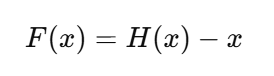

where F(x) represents the difference between the desired function H(x) and the input x.

Residual learning is a technique designed to make deep neural networks easier to train by addressing the degradation problem. The problem arises from neural networks having many layers stacked together and as a result worsens performance. The main idea is instead of learning the target function H(x) directly, the network learns the residual function F(x) = H(x) -(H)x which represents the difference between the desired output and input. The final output is then computed as H(x) = F(x) + x. This way simplifies the learning process for a few reasons. The first of which is that if the optimal function is close to the input then as a result the network only needs to adjust slightly. If the F(x) = 0 then the network does not need to do anything except pass through the input. By focusing on the difference required, the networks has a simpler task. In simpler terms the model only needs to figure out what is missing or what needs change, rather than building the whole function from the ground up, helping solve the degradation problem.

**Difference between the models:**
- VGG116:
 - Simpler architecture with a sequential arrangement of layers.
 - Effective for smaller datasets or tasks requiring fewer parameters.
 - Computationally heavier due to the absence of shortcuts.
- ResNet50:
 - More advanced architecture.
 - Leverages residual connections for better gradient flow.
 - Scales well with depth, making it suitable for complex and large-scale tasks.
 - More efficient in terms of learning deeper representations.

**Flowchart diagram of VG116:**

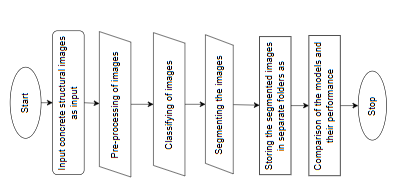


**Flowchart diagram of ResNet:**

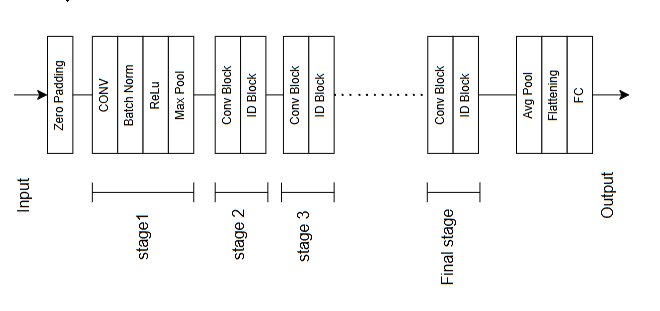

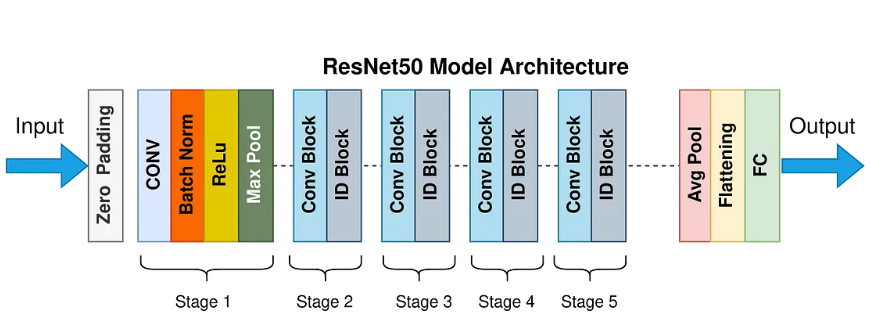

### Hyperparameters
- **Learning Rate:** This controls how much the model adjusts its weights after each step. It is a small learning rate(0.00001) is used to make small, careful updates which is important when fine-tuning pre-trained models to avoid overwriting what they already learned.
- **Batch Size:** This is the number of images processed together in one step. A batch size of 32 was used to balance memory efficency and computational speed.
- **Optimizer:** The Adam optimizer was chosen for its adaptive learning rate, which imporves convergence and the speed at which it improves convergence.

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import kagglehub
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model

#getting dataset from Kaggle
path = kagglehub.dataset_download("nitishabharathi/scene-classification")

print("Path to dataset files:", path)

100%|██████████| 361M/361M [00:02<00:00, 184MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nitishabharathi/scene-classification/versions/1


CSV File Columns: Index(['image_name', 'label'], dtype='object')
  image_name  label
0      0.jpg      0
1      1.jpg      4
2      2.jpg      5
3      4.jpg      0
4      7.jpg      4
Correlation Matrix:
       label
label    1.0
Processed Dataset Size: (17034, 224, 224, 3), Labels Size: (17034,)


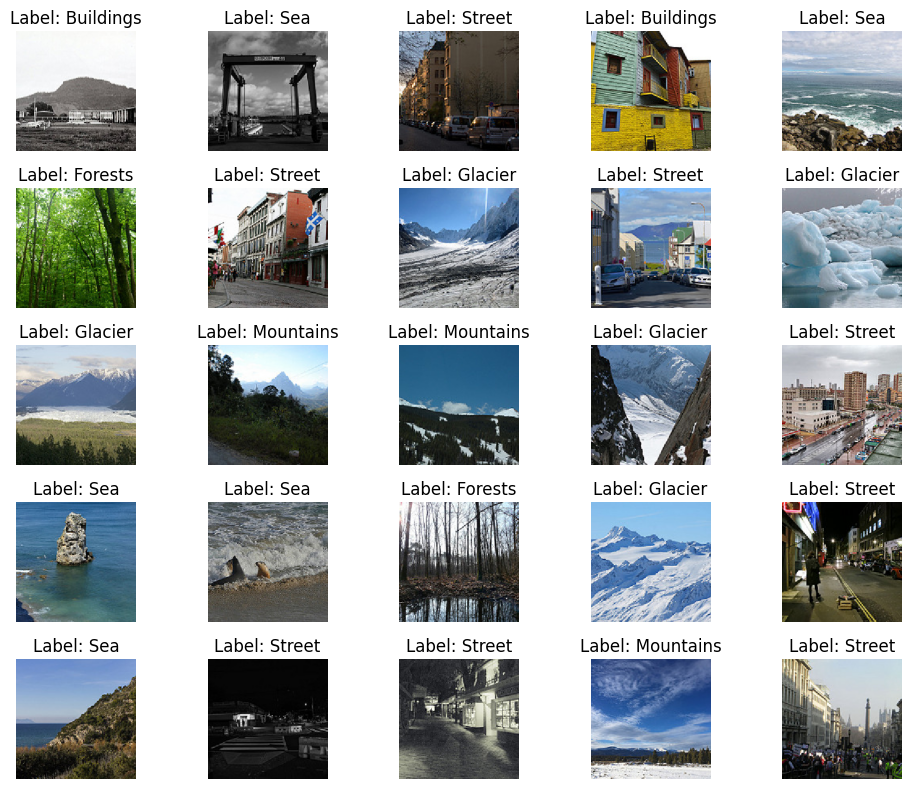

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Load the CSV file and display the first few rows to check the content
csv_file_path = '/root/.cache/kagglehub/datasets/nitishabharathi/scene-classification/versions/1/train-scene classification/train.csv'
image_dir = '/root/.cache/kagglehub/datasets/nitishabharathi/scene-classification/versions/1/train-scene classification/train'


df = pd.read_csv(csv_file_path)
print("CSV File Columns:", df.columns)
print(df.head())

# Check if 'label' and 'image_name' columns exist in the CSV
if 'label' not in df.columns or 'image_name' not in df.columns:
    raise ValueError("CSV file does not contain 'label' or 'image_name' columns.")

# Generate a correlation matrix for numerical columns
corr_mat = df.corr(numeric_only=True)
print("Correlation Matrix:")
print(corr_mat)
label_names = ['Buildings', 'Forests', 'Glacier', 'Mountains', 'Sea', 'Street']
# Encode the labels using LabelEncoder
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

# LIMIT = 1000
# df = df.head(LIMIT)
#This allows you to reduce the sample size of images down to 1000, allowing you to run faster, but reduces accuracy if running same amount of epochs.
#The dataset also becomes more scewed

#defining image size
IMG_SIZE = 224

# Function to preprocess images
def preprocess_image(img_path):
    if not os.path.exists(img_path):
        print(f"Image not found: {img_path}")
        return None
    #load images to size 224 by 224
    img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = img_to_array(img) / 255.0  # Normalises images to [0, 1]
    return img_array

# Preprocess all images creating file paths and handle missing files
df['image_array'] = df['image_name'].apply(
    lambda x: preprocess_image(os.path.join(image_dir, x))
)

# Drop rows where images could not be loaded
df.dropna(subset=['image_array'], inplace=True)

# Map the encoded labels back to their original labels
df['label_mapped'] = label_encoder.inverse_transform(df['label_encoded'])

# Convert the images and labels to arrays
X = np.array(df['image_array'].tolist())
y = np.array(df['label_encoded'])

print(f"Processed Dataset Size: {X.shape}, Labels Size: {y.shape}")

# Visualising some sample images with labels
def visualise_images(df, image_dir, label_names):
    plt.figure(figsize=(10, 8))
    #25 images displayed in a 5 by 5 grid
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        img_path = os.path.join(image_dir, df.iloc[i]['image_name'])
        #ensures images are 224,224
        img = load_img(img_path, target_size=(224, 224))
        plt.imshow(img)
        #correlates 0 to buildings etc.
        label = label_names[df.iloc[i]['label_encoded']]
        plt.title(f"Label: {label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

visualise_images(df, image_dir, label_names)


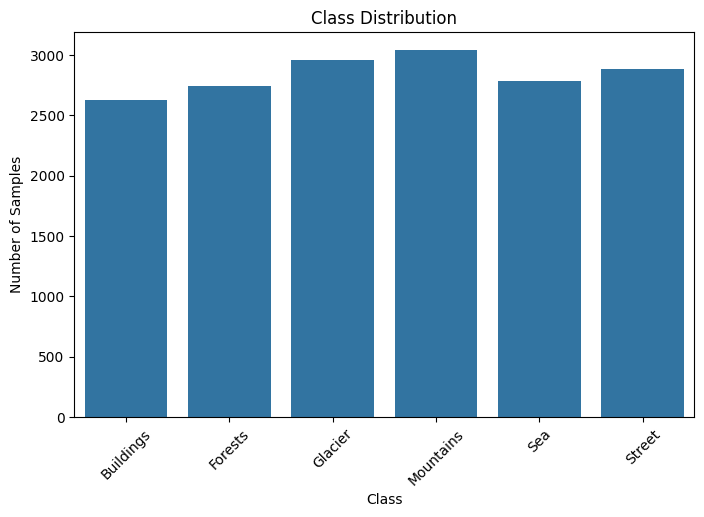

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='label_encoded', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(ticks=range(len(label_names)), labels=label_names, rotation=45)
plt.show()


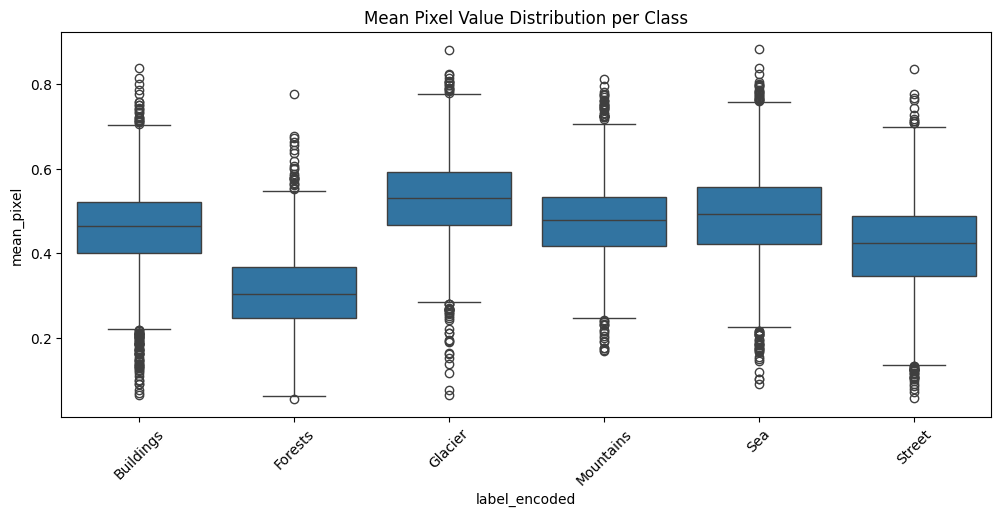

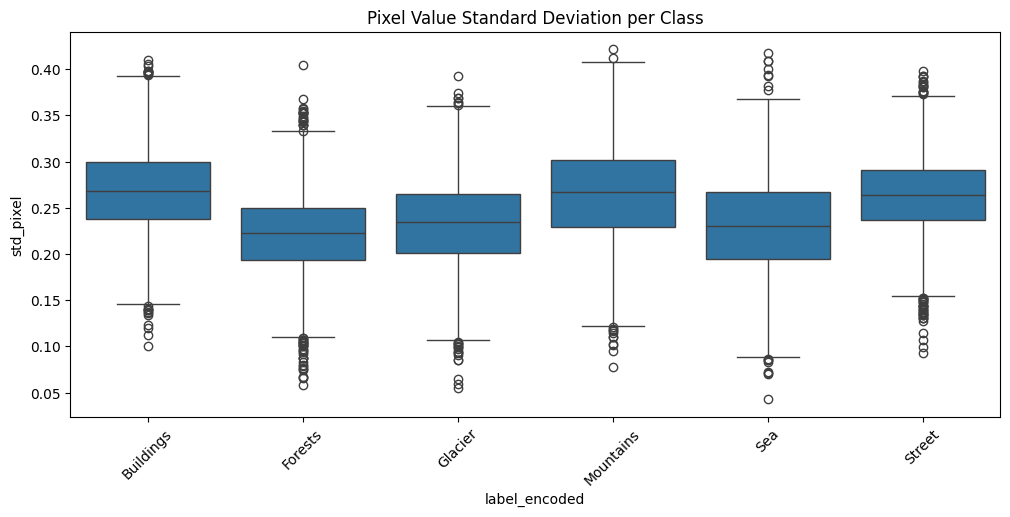

In [ ]:
df['mean_pixel'] = df['image_array'].apply(lambda x: np.mean(x))
df['std_pixel'] = df['image_array'].apply(lambda x: np.std(x))

plt.figure(figsize=(12, 5))
sns.boxplot(x='label_encoded', y='mean_pixel', data=df)
plt.title('Mean Pixel Value Distribution per Class')
plt.xticks(ticks=range(len(label_names)), labels=label_names, rotation=45)
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x='label_encoded', y='std_pixel', data=df)
plt.title('Pixel Value Standard Deviation per Class')
plt.xticks(ticks=range(len(label_names)), labels=label_names, rotation=45)
plt.show()


Mean Pixel Value Distribution
--
**Forests:**

This class has the lowest mean pixel value distribution, with the box concentrated around 0.3–0.5 and several lower outliers. This suggests that forest images are generally darker, possibly due to shadows or dense tree cover.

**Glacier and Sea:**

These two classes have higher mean pixel values, with their boxes concentrated around 0.5–0.7. This indicates that these images are generally brighter, likely due to light reflections off ice or water.

**Buildings, Mountains, and Street:**

These classes have mean pixel distributions clustered around the middle range (~0.4–0.6), indicating moderate brightness. However, these classes also show some overlap in their distributions.


Some of the similarities in pixel value distribution could cause the model to confuse classes

-------

# Standard Deviation Reflects Image Contrast
--
**Higher Standard Deviation:**
Indicates greater variation in pixel intensities within an image, typically due to higher contrast or more texture.

**Lower Standard Deviation:** Suggests more uniform pixel intensities, meaning the image is smoother or less textured.

Several classes, such as Buildings, Mountains, and Street, have overlapping standard deviation distributions. This overlap could make it challenging for the model to differentiate these classes based solely on pixel variability.
Forests stand out with consistently low standard deviation, making it easier for the model to identify them based on uniformity.

In [ ]:
# Split the data into training and testing sets in a 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#shows how many images are in training and testing, 17000 images split up
print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")


Training set size: (13627, 224, 224, 3), Testing set size: (3407, 224, 224, 3)


In [ ]:
#Loads resnet50 model with initialised weights from imagenet and includes all convlutional layers
resnet_model = ResNet50(weights='imagenet', include_top=True)

#removes last layer and outputs 6 for each image classification
resnet_model.layers[-1] = Dense(6, activation='softmax')  # Change output layer for 6 classes

# Make all layers trainable fine-tune the entire model
for layer in resnet_model.layers:
    layer.trainable = True

resnet_model.summary()


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
# Loads the VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=True)

#Changes last layer to allow for the 6 scenes
vgg_model.layers[-1] = Dense(6, activation='softmax')  # Change output layer for 6 classes

#All layers train allow for changing
for layer in vgg_model.layers:
    layer.trainable = True

#outputs a summary for each layer
vgg_model.summary()


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

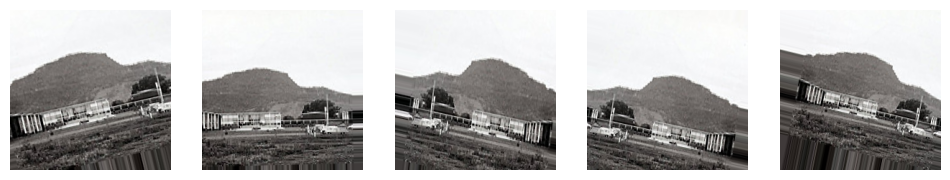

In [ ]:
#Rotates images and shifts them
#distorts images
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

#displaying the first image and augmented
import matplotlib.pyplot as plt
sample_image = X[0]
sample_image = sample_image.reshape((1,) + sample_image.shape)

plt.figure(figsize=(12, 6))
for i, augmented_image in enumerate(datagen.flow(sample_image, batch_size=1)):
    if i >= 5:  # Show 5 augmented images
        break
    plt.subplot(1, 5, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis('off')
plt.show()

In [ ]:
#This compiles the VGG model, sparse categorical crossentropy is more memory efficient since our labels were integers originally.
vgg_model.compile(optimizer=Adam(learning_rate=0.00001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

#this trains 5 epochs on batches of 32 augmented images, allowing for better training and recognition
#this helps prevent overfitting
#We also ran 5 epochs as this took a long time with over 17000 images
history = vgg_model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=5,
    validation_data=(X_test, y_test)
)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


426/426 ━━━━━━━━━━━━━━━━━━━━ 144s 318ms/step - accuracy: 0.6748 - loss: 1.0548 - val_accuracy: 0.9028 - val_loss: 0.2645
Epoch 2/5
426/426 ━━━━━━━━━━━━━━━━━━━━ 132s 304ms/step - accuracy: 0.9016 - loss: 0.2923 - val_accuracy: 0.9061 - val_loss: 0.2605
Epoch 3/5
426/426 ━━━━━━━━━━━━━━━━━━━━ 132s 304ms/step - accuracy: 0.9199 - loss: 0.2309 - val_accuracy: 0.9184 - val_loss: 0.2167
Epoch 4/5
426/426 ━━━━━━━━━━━━━━━━━━━━ 131s 303ms/step - accuracy: 0.9292 - loss: 0.2014 - val_accuracy: 0.9237 - val_loss: 0.2088
Epoch 5/5
426/426 ━━━━━━━━━━━━━━━━━━━━ 132s 304ms/step - accuracy: 0.9363 - loss: 0.1776 - val_accuracy: 0.9319 - val_loss: 0.2003


In [ ]:
#Compiles ResNet50 using a slightly smaller learning rate, speeding up converge
resnet_model.compile(optimizer=Adam(learning_rate=.0001),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

#does the same as vgg just different naming for graph plotting.
history2 = resnet_model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=5,
    validation_data=(X_test, y_test)
)

Epoch 1/5
426/426 ━━━━━━━━━━━━━━━━━━━━ 204s 363ms/step - accuracy: 0.7675 - loss: 1.2240 - val_accuracy: 0.3132 - val_loss: 3.1586
Epoch 2/5
426/426 ━━━━━━━━━━━━━━━━━━━━ 132s 306ms/step - accuracy: 0.9200 - loss: 0.2328 - val_accuracy: 0.8964 - val_loss: 0.2988
Epoch 3/5
426/426 ━━━━━━━━━━━━━━━━━━━━ 132s 306ms/step - accuracy: 0.9364 - loss: 0.1797 - val_accuracy: 0.9222 - val_loss: 0.2447
Epoch 4/5
426/426 ━━━━━━━━━━━━━━━━━━━━ 133s 307ms/step - accuracy: 0.9397 - loss: 0.1569 - val_accuracy: 0.9190 - val_loss: 0.2378
Epoch 5/5
426/426 ━━━━━━━━━━━━━━━━━━━━ 132s 304ms/step - accuracy: 0.9519 - loss: 0.1291 - val_accuracy: 0.9281 - val_loss: 0.2240


In [ ]:
loss, accuracy = vgg_model.evaluate(X_test, y_test)
loss2, accuracy2 = resnet_model.evaluate(X_test, y_test)
print(f"Test Accuracy ResNet: {accuracy2:.2f}")
print(f"Test Accuracy VGG: {accuracy:.2f}")


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9358 - loss: 0.1901
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9303 - loss: 0.2056
Test Accuracy ResNet: 0.93
Test Accuracy VGG: 0.93


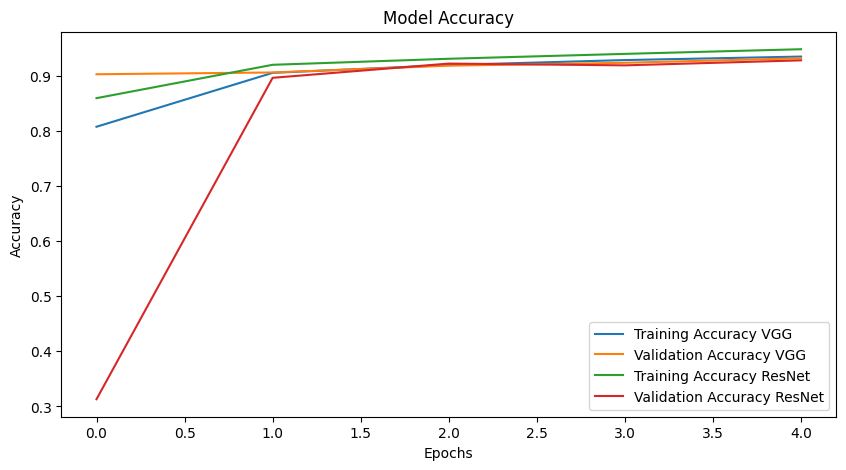

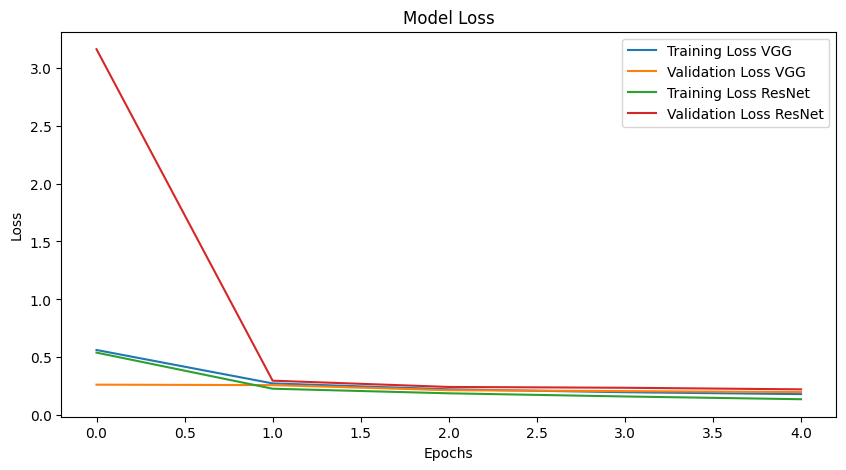

In [ ]:
# Plot the accuracy for training and validation
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy VGG')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy VGG')
plt.plot(history2.history['accuracy'], label='Training Accuracy ResNet')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy ResNet')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the loss for training and validation
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss VGG')
plt.plot(history.history['val_loss'], label='Validation Loss VGG')
plt.plot(history2.history['loss'], label='Training Loss ResNet')
plt.plot(history2.history['val_loss'], label='Validation Loss ResNet')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Model Accuracy**
---

Both model perform similarly for testing data and validation data

Resnet50 initially is inaccurate in the first epoch but converges quickly and gets to a similar level.


Testing Scores

**VGG16 Training Accuracy:** 0.9368

**ResNet50 Training Accuracy:** 0.9519

------

Validation scores

**VGG16 Validation Accuracy:** 0.92

**ResNet50 Validation Accuracy:** 0.93

The similarity in the accuracy scores shows that the risk of over fitting is minimal and that the models can generalise for unseen data



**Model Loss**
-----

Model loss follows a similar pattern with ResNet50 validation quickly reaching the same level as the others quickly

For both models the validation loss stabilizes early, indicating the models converge quickly.

This could be a sign that your learning rate is appropriately chosen and the models are not underfitting.

107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step
VGG Classification Report:
              precision    recall  f1-score   support

   Buildings       0.93      0.94      0.93       548
     Forests       0.98      1.00      0.99       550
     Glacier       0.91      0.86      0.89       599
   Mountains       0.89      0.92      0.90       594
         Sea       0.93      0.97      0.95       554
      Street       0.95      0.92      0.94       562

    accuracy                           0.93      3407
   macro avg       0.93      0.93      0.93      3407
weighted avg       0.93      0.93      0.93      3407

ResNet Classification Report:
              precision    recall  f1-score   support

   Buildings       0.97      0.87      0.92       548
     Forests       0.99      0.99      0.99       550
     Glacier       0.91      0.88      0.89       599
   Mountains       0.89      0.91      0.90       594
         Sea       0.96      0.94      0.95  

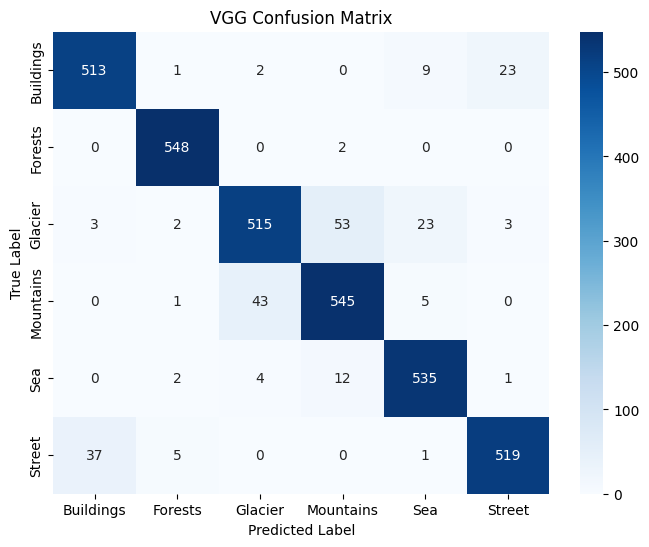

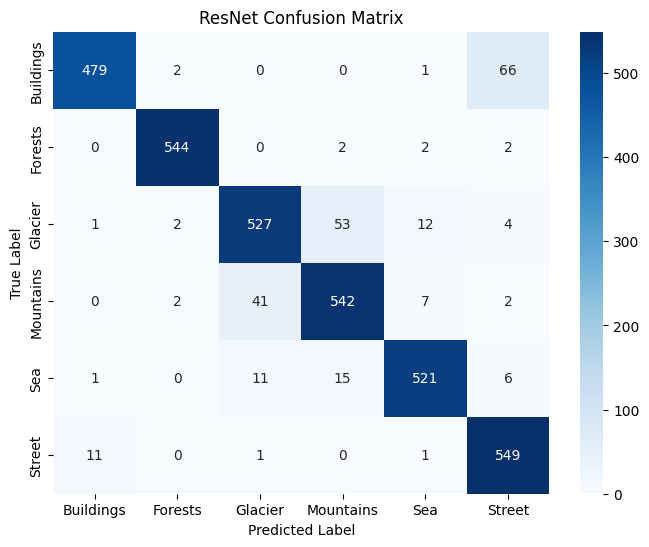

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define your class labels
label_names = ['Buildings', 'Forests', 'Glacier', 'Mountains', 'Sea', 'Street']

# Predictions for the VGG model
y_pred_vgg = np.argmax(vgg_model.predict(X_test), axis=1)
y_pred_resnet = np.argmax(resnet_model.predict(X_test), axis=1)

# Convert the numeric labels back to the original class names for the test set
y_test_labels = [label_names[i] for i in y_test]
y_pred_vgg_labels = [label_names[i] for i in y_pred_vgg]
y_pred_resnet_labels = [label_names[i] for i in y_pred_resnet]

# Classification report for VGG
print("VGG Classification Report:")
print(classification_report(y_test_labels, y_pred_vgg_labels, target_names=label_names))

# Classification report for ResNet
print("ResNet Classification Report:")
print(classification_report(y_test_labels, y_pred_resnet_labels, target_names=label_names))

# Confusion matrix for VGG
conf_mat_vgg = confusion_matrix(y_test_labels, y_pred_vgg_labels, labels=label_names)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_vgg, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.title('VGG Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Confusion matrix for ResNet
conf_mat_resnet = confusion_matrix(y_test_labels, y_pred_resnet_labels, labels=label_names)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_resnet, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.title('ResNet Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


**Overall Performance and Evaluation**
---
**Accuracy:**

VGG achieved an overall accuracy of 93%.
ResNet achieved an overall accuracy of 93%.
No difference in test accuracy

**Macro and Weighted Averages:**

Both models have similar macro and weighted averages for precision, recall, and F1-score, all at 93%. This shows both models generalize well across all classes.

---
**Class-Specific Performance**
--

**Buildings:**
--
**VGG:**

Precision = 0.93

Recall = 0.94

F1-score = 0.93

**ResNet:**

Precision = 0.98

Recall = 0.87

F1-score = 0.92

**Comparison:**

ResNet has slightly better precision, meaning it is better at avoiding false positives.
However, ResNet’s recall is lower, indicating it misses more true positives for "Buildings" compared to VGG.

------
**Forests:**
--
**VGG:**

Precision = 0.99,

Recall = 1.00,

F1-score = 0.99

**ResNet:**

Precision = 0.99

Recall = 0.99

F1-score = 0.99

**Comparison:** Both models perform nearly perfectly for Forests,indicating these images are easier to classify.

----
**Glacier:**
--
**VGG:**

Precision = 0.91

Recall = 0.86

F1-score = 0.89

**ResNet:**

Precision = 0.91

Recall = 0.88

F1-score = 0.89

**Comparison:**
ResNet has higher precision but lower recall than VGG.
ResNet avoids false positives for Glacier, but VGG retrieves more true positives.

-----
**Mountains:**
--
**VGG:**

Precision = 0.89

Recall = 0.92

F1-score = 0.90

**ResNet**

Precision = 0.88

Recall = 0.91

F1-score = 0.90


**Comparison:**

ResNet has better recall, meaning it correctly identifies more Mountains.
VGG has slightly better precision, avoiding more false positives.

---
**Sea:**
--
**VGG:**

Precision = 0.93

Recall = 0.97

F1-score = 0.95

**ResNet:**

Precision = 0.96

Recall = 0.94

F1-score = 0.95

**Comparison:**
ResNet has slightly higher recall and F1-score, indicating it identifies more Sea images correctly.

---
**Street:**
--
**VGG:**

Precision = 0.95

Recall = 0.92

F1-score = 0.94

**ResNet:**

Precision = 0.87

Recall = 0.98

F1-score = 0.92


**Comparison:**
ResNet has higher recall, meaning it misses fewer true positives for Street.
VGG has slightly higher precision, avoiding more false positives.


---
Strengths and Weaknesses of Each Model
--
**VGG:**

Strengths:

Better recall for Buildings and Glacier, indicating it retrieves more true positives for these classes.
Generally better precision for avoiding false positives in most classes.

Weaknesses:

Slightly lower overall accuracy compared to ResNet.
Recall is lower for classes like Mountains and Street.

**ResNet:**

Strengths:

Better recall for Mountains, Sea, and Street, meaning it is more effective at correctly identifying true positives for these classes.
Slightly higher overall accuracy.

Weaknesses:

Lower precision for Buildings and Street, leading to more false positives.


In [ ]:
import numpy as np

# Identify misclassified samples for VGG
misclassified_indices_vgg = np.where(y_pred_vgg != y_test)[0]

# Identify misclassified samples for ResNet
misclassified_indices_resnet = np.where(y_pred_resnet != y_test)[0]


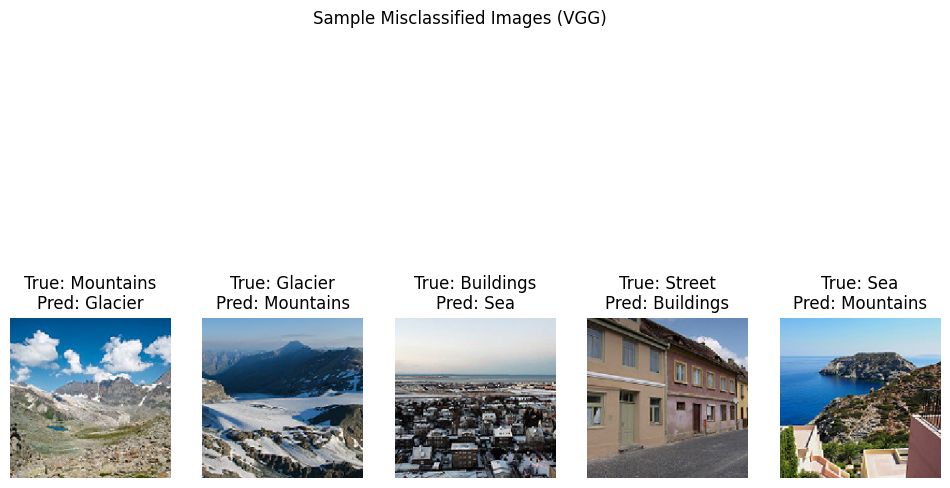

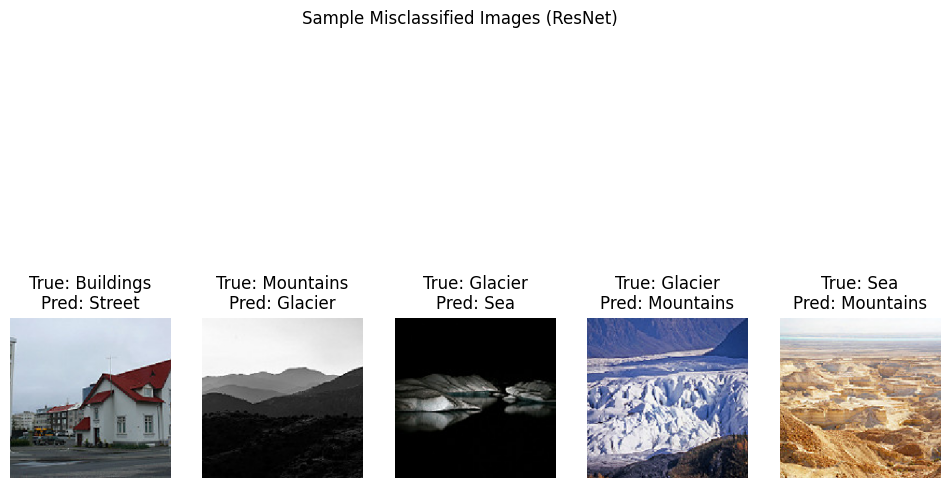

In [ ]:
import matplotlib.pyplot as plt

# Define your class names
label_names = ['Buildings', 'Forests', 'Glacier', 'Mountains', 'Sea', 'Street']


def display_misclassified_images(model_name, X, y_true, y_pred, misclassified_indices, label_names, num_samples=5):
    """Display misclassified images with their true and predicted labels."""
    plt.figure(figsize=(12, 8))

    # Show a few misclassified images
    for i, index in enumerate(misclassified_indices[:num_samples]):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X[index])
        plt.axis('off')
        true_label = label_names[y_true[index]]
        predicted_label = label_names[y_pred[index]]
        plt.title(f"True: {true_label}\nPred: {predicted_label}")

    plt.suptitle(f"Sample Misclassified Images ({model_name})")
    plt.show()

# Display misclassified images for VGG model
display_misclassified_images("VGG", X_test, y_test, y_pred_vgg, misclassified_indices_vgg, label_names)

# Display misclassified images for ResNet model
display_misclassified_images("ResNet", X_test, y_test, y_pred_resnet, misclassified_indices_resnet, label_names)


Sample Misclassified Images
--
This is a small sample of images misclassified by ResNet and VGG, from analysis of the dataset it was obvious that our main challenge would be getting our models to distinguish between Glaciers and Mountain, and also Streets and Buildings

The similarity of these images are difficult for humans and have very similar features. Our models generally preformed well, however both had issues with distinguishing at least one similar class from another